In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import itertools 
def findsubsets(s, n): 
    return [i for i in itertools.combinations(s, n)] 

In [3]:
city_locations = np.loadtxt('tsp.txt', skiprows=1)

In [4]:
group_1 = city_locations[[0, 1]]

In [5]:
group_2 = city_locations[[9, 10]]

In [6]:
group_3 = city_locations[[20, 21, 22]]

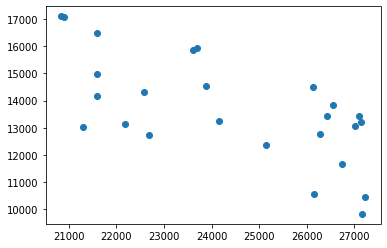

In [7]:
x, y = city_locations.T
plt.scatter(x, y)

In [34]:
city_locations_reduce = np.delete(city_locations, [1, 10], axis=0)

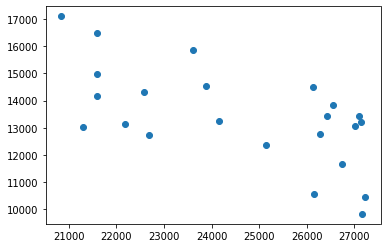

In [35]:
x, y = city_locations_reduce.T
plt.scatter(x, y)

In [36]:
def compute_dist(city_locations, k, j):
    return np.linalg.norm(city_locations[k] - city_locations[j])

In [37]:
def held_karp(dists):
    """
    Implementation of Held-Karp, an algorithm that solves the Traveling
    Salesman Problem using dynamic programming with memoization.
    Parameters:
        dists: distance matrix
    Returns:
        A tuple, (cost, path).
    """
    n = len(dists)

    # Maps each subset of the nodes to the cost to reach that subset, as well
    # as what node it passed before reaching this subset.
    # Node subsets are represented as set bits.
    C = {}

    # Set transition cost from initial state
    for k in range(1, n):
        C[(1 << k, k)] = (dists[0][k], 0)

    # Iterate subsets of increasing length and store intermediate results
    # in classic dynamic programming manner
    for subset_size in range(2, n):
        print(subset_size)
        for subset in itertools.combinations(range(1, n), subset_size):
            # Set bits for all nodes in this subset
            bits = 0
            for bit in subset:
                bits |= 1 << bit

            # Find the lowest cost to get to this subset
            for k in subset:
                prev = bits & ~(1 << k)

                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev, m)][0] + dists[m][k], m))
                C[(bits, k)] = min(res)

    # We're interested in all bits but the least significant (the start state)
    bits = (2**n - 1) - 1

    # Calculate optimal cost
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + dists[k][0], k))
    opt, parent = min(res)

    # Backtrack to find full path
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits

    # Add implicit start state
    path.append(0)

    return opt, list(reversed(path))

In [38]:
n = len(city_locations_reduce)
dists_reduce = [[0] * n for i in range(n)]
for i in range(n):
    for j in range(n):
        dists_reduce[i][j] = compute_dist(city_locations_reduce, i, j)

In [32]:
n = len(city_locations)
dists = [[0] * n for i in range(n)]
for i in range(n):
    for j in range(n):
        dists[i][j] = compute_dist(city_locations, i, j)

In [39]:
opt, path = held_karp(dists_reduce)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [40]:
opt

26282.18340049283

In [29]:
path

[0, 4, 8, 9, 12, 16, 15, 18, 14, 17, 20, 19, 13, 11, 10, 7, 5, 1, 2, 6, 3]

In [41]:
opt + compute_dist(city_locations, 0, 1) + compute_dist(city_locations, 9, 10) 

26463.437684265213

In [63]:
path_correct = []
for c in path:
    if c == 0:
        path_correct.append(c)
    elif c > 0 and c <= 8:
        path_correct.append(c+1)
    else:
        path_correct.append(c+2)

In [70]:
total_len = 0
for n in range(len(path_correct)-1):
    total_len += compute_dist(city_locations, path_correct[n], path_correct[n+1])
total_len += compute_dist(city_locations, path_correct[0], path_correct[-1])
print(total_len)

26442.73030895475


In [68]:
path_correct.insert(4, 10)

In [69]:
path_correct

[0,
 1,
 5,
 9,
 10,
 11,
 14,
 18,
 17,
 21,
 22,
 20,
 16,
 19,
 24,
 23,
 15,
 13,
 12,
 8,
 6,
 2,
 3,
 7,
 4]